In [12]:
import matplotlib.pyplot as plt
import pandas as pd
from geospatial0516 import *

In [112]:
# Segment & Polygon intersection


# Function: create segments list (of points pair) based on points in polygon
def get_seg_from_pol(pol):
    pol_seg = []
    for i in range(1, pol.size):
        pol_seg.append(Segment(pol.points[i-1], pol.points[i]))
    #for i in range(0, (pol.size-1)):
    #    pol_seg.append(Segment(pol.points[i], pol.points[i+1]))
    # pol_seg.append(Segment(pol.points[pol.size-1], pol.points[0]))
    return pol_seg

# Function: calculate the intersection point of two segments which intersects
def get_intersect_point(seg1, seg2):
    A1 = seg1.end.y - seg1.start.y
    B1 = seg1.start.x - seg1.end.x
    C1 = seg1.end.x * seg1.start.y - seg1.start.x * seg1.end.y
    A2 = seg2.end.y - seg2.start.y
    B2 = seg2.start.x - seg2.end.x
    C2 = seg2.end.x * seg2.start.y - seg2.start.x * seg2.end.y
    if (A1 * B2 != A2 * B1):
        x = (C2 * B1 - C1 * B2)/(A1 * B2 - A2 * B1)
        y = (C1 * A2 - C2 * A1)/(A1 * B2 - A2 * B1)
    else:
        print("error: might need remove duplicated points first")
    return Point(x, y)

# Function: check if one segment touches the other if they already intersects, True is touch, False if intersection
def check_touch(seg1, seg2):
    if (seg1.start == seg2.start) or (seg1.start == seg2.end) or (seg1.end == seg2.start) or (seg1.end == seg2.end):
        print("point touches")
        return True
    elif (seg1.start.x == seg1.end.x) and ((seg1.start.x == seg2.start.x) or (seg1.start.x == seg2.end.x)):
        print("seg1 is vertical, and seg2 touches")
        return True
    elif (seg2.start.x == seg2.end.x) and ((seg2.start.x == seg1.start.x) or (seg2.start.x == seg1.end.x)):
        print("seg2 is vertical, and seg1 touches")
        return True
    elif (seg1.start.x != seg1.end.x) and (seg2.start.x != seg2.end.x):
        f1 = (seg1.end.y - seg1.start.y)/(seg1.start.x - seg1.end.x)
        f2 = (seg2.end.y - seg2.start.y)/(seg2.start.x - seg2.end.x)
        if f1 == f2:
            print("they are parallel")
            return True
        else:
            A1 = seg1.end.y - seg1.start.y
            B1 = seg1.start.x - seg1.end.x
            C1 = seg1.end.x * seg1.start.y - seg1.start.x * seg1.end.y
            A2 = seg2.end.y - seg2.start.y
            B2 = seg2.start.x - seg2.end.x
            C2 = seg2.end.x * seg2.start.y - seg2.start.x * seg2.end.y
            if (seg2.start.x*A1 + seg2.start.y*B1 + C1 == 0) or (seg2.end.x*A1 + seg2.end.y*B1 + C1 == 0) or (seg1.start.x*A2 + seg1.start.y*B2 + C2 == 0) or (seg1.end.x*A2 + seg1.end.y*B2 + C2 == 0):
                print("one point lies on the other")
                return True
            else:
                print("not touch, fine")
                return False
    else:
        print("nope")
        return False
    
    
    
# Function: sorting points group
def sorting_PointGroup(pointgroup):
    n = len(pointgroup)
    xlist = []
    ylist = []
    for i in range(0, n):
        xlist.append(pointgroup[i].x)
        ylist.append(pointgroup[i].y)
    xy = pd.DataFrame()
    xy['x'] = xlist
    xy['y'] = ylist
    xy.sort_values(by=['x', 'y'], inplace = True)
    xy.reset_index(drop = True, inplace = True)
    pointgroup_sorted = []
    for j in range(0, n):
        pointgroup_sorted.append(Point(xy['x'][j], xy['y'][j]))
    # print("done")
    # print(pointgroup_sorted)
    return pointgroup_sorted


# The algorithm that works for concave hull also works for convex hull, 
# so it's not necessary to differeniate between convex and concave hull at the beginning.

# Function: Check if one segment intersects with one polygon or not and calculate the overlapping length
## Notice: Touching the edge of polygon is not considered as intersection in the following lines
def inter_seg_pol(seg, pol):
    # print(seg)
    # print(pol)
    
    # Create ordered segments from polygon
    segments_list = get_seg_from_pol(pol)
    # print(segments_list)
    # Prepare intersection segments list
    int_seg = []
    for i in range(0, (pol.size-1)):
        int_seg.append(seg.intersects(segments_list[i]))
    print(int_seg)
    ## The segment has no intersection with edges of the polygon
    if set(int_seg) == {False}:
        ### The two points of the segment are both outside the polygon - No Need for further calculation
        if (pol.containsPoint(seg.start) == False) and (pol.containsPoint(seg.end) == False):
            length = 0
            print(f"\nThe intersection length is: {length:.2f}")
            print("outside outside")
        ### The two points of the segment are both inside the polygon
        elif (pol.containsPoint(seg.start) == True) and (pol.containsPoint(seg.end) == True):
        #### Calculate the length of the segment
            length = seg.length
            print(f"\nThe intersection length is: {length:.2f}")
            print("inside inside")
        else:
            print("error: one point outside, one point inside and no intersection")
    ## The segment has intersection with edges of the polygon
    else:
        # print(int_seg)
        point_i = []
        length_i = []
        seg_i = []
        for i in range(1, len(int_seg)):
            # Find the edges which the segment intersects with
            # print(int_seg[i])
            # Generate a list of intersecting points
            if int_seg[i] == True:
                print("intersection!")
                # Check whether it is a touch or not
                # print(seg)
                # print(int_seg)
                # print(segments_list)
                print(segments_list[i])
                # print(segments_list[i+1])
                print(check_touch(seg, segments_list[i]))
                if check_touch(seg, segments_list[i]) == False:
                    # Find the intersecting point and store it in a list
                    # print(segments_list[i])
                    point_i.append(get_intersect_point(seg, segments_list[i]))
                    # print(point_i)
                else:
                    print("it's a touch instead of intersection")
            else:
                print("no intersection with this edge")
        # print(point_i)
        point_i.append(seg.start)
        point_i.append(seg.end)
        # print(point_i)    
        point_i = sorting_PointGroup(point_i)
        print(point_i)
        for j in range(1, ((len(point_i))-1)):
            seg_i.append(Segment(point_i[j-1], point_i[j]))
            # Check if the center of the segments lie inside or outside the polygon
            x_m = (point_i[j-1].x + point_i[j].x)/2
            y_m = (point_i[j-1].y + point_i[j].y)/2
            p_i_m = Point(x_m, y_m)
            if pol.containsPoint(p_i_m) == True:
                length_i.append((Segment(point_i[j], point_i[j+1])).length)
            else:
                length_i.append(0)
                print('this small segment is not inside this polygon')
        # print(length_i)
        length = sum(length_i)
        print(f"\nThe intersection length is: {length:.2f}")           
         
                
    
    
    
    
    
    #### Store all the intersecting point and create new segments
    #### Check if the the center point of the segment lie inside or outside the polygon for each segment
    #### Calculate the total length of the segments which its center lies inside the polygon
    
    



In [115]:
# Plot function for segments
def pS(seg):    
    x1 = [seg.start.x, seg.end.x]
    y1 = [seg.start.y, seg.end.y]
    plt.plot(x1, y1, linestyle="dashed", marker="o")
    plt.show()
def pSS(seg1, seg2):
    x1 = [seg1.start.x, seg1.end.x]
    y1 = [seg1.start.y, seg1.end.y]
    plt.plot(x1, y1, linestyle="dashed", marker="o")
    x2 = [seg2.start.x, seg2.end.x]
    y2 = [seg2.start.y, seg2.end.y]
    plt.plot(x2, y2, linestyle="dashed", marker="o")
    plt.show()
# Plot function for polygons
def pP(pol):
    xs = [i.x for i in pol]
    ys = [i.y for i in pol]
    plt.plot(xs, ys, linestyle='dashed')
    plt.show()

def plot_sp(seg, pol):
    xs = [i.x for i in pol]
    ys = [i.y for i in pol]
    plt.plot(xs, ys, linestyle='dashed')
    x1 = [seg.start.x, seg.end.x]
    y1 = [seg.start.y, seg.end.y]
    plt.plot(x1, y1, linestyle="dashed", marker="o")
    plt.show()

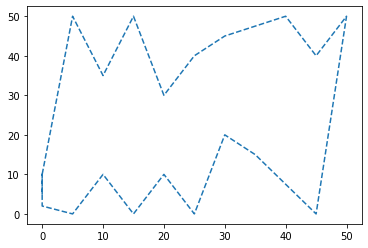

In [116]:
# Sample polygon (random points for the outline of England)
data_p = [[0,5],[0,10],[0,2],[5,0], [10,10], [15,0], [20,10], [25, 0],
             [30, 20], [35, 15], [45, 0], [50, 50], [45, 40], 
             [40, 50], [30, 45], [25, 40], [20, 30], [15, 50],
             [10,35], [5,50], [0, 10]]
samplePolygon = Polygon(data_p, xcol=0, ycol=1)
xs = [i.x for i in samplePolygon]
ys = [i.y for i in samplePolygon]
plt.plot(xs, ys, linestyle='dashed')


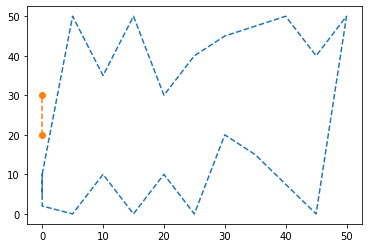

In [117]:
seg1 = Segment(Point(0,20), Point(0,30))
# inter_seg_pol(seg1, samplePolygon)
plt.plot(xs, ys, linestyle='dashed')
pS(seg1)

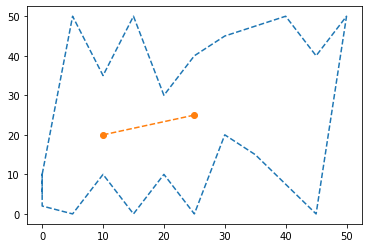

In [118]:
seg2 = Segment(Point(10,20), Point(25,25))
plt.plot(xs, ys, linestyle='dashed')
pS(seg2)

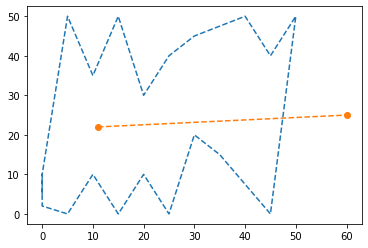

True
False


In [119]:
pol = samplePolygon
segt = Segment(Point(11,22), Point(60,25))
plot_sp(segt, pol)
print(pol.containsPoint(segt.start))
print(pol.containsPoint(segt.end))

In [120]:
inter_seg_pol(segt, pol)

[False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False]
no intersection with this edge
no intersection with this edge
no intersection with this edge
no intersection with this edge
no intersection with this edge
no intersection with this edge
no intersection with this edge
no intersection with this edge
no intersection with this edge
intersection!
Segment with start Point(x=45.00, y=0.00) and end Point(x=50.00, y=50.00).
not touch, fine
False
not touch, fine
no intersection with this edge
no intersection with this edge
no intersection with this edge
no intersection with this edge
no intersection with this edge
no intersection with this edge
no intersection with this edge
no intersection with this edge
no intersection with this edge
[Point(x=11.00, y=22.00), Point(x=47.42, y=24.23), Point(x=60.00, y=25.00)]

The intersection length is: 12.60


[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True]
no intersection with this edge
no intersection with this edge
no intersection with this edge
no intersection with this edge
no intersection with this edge
no intersection with this edge
no intersection with this edge
no intersection with this edge
no intersection with this edge
no intersection with this edge
no intersection with this edge
no intersection with this edge
no intersection with this edge
no intersection with this edge
no intersection with this edge
no intersection with this edge
no intersection with this edge
no intersection with this edge
intersection!
Segment with start Point(x=5.00, y=50.00) and end Point(x=0.00, y=10.00).
not touch, fine
False
not touch, fine
[Point(x=1.00, y=30.00), Point(x=2.46, y=29.70), Point(x=25.00, y=25.00)]
this small segment is not inside this polygon

The intersection length is: 0.00


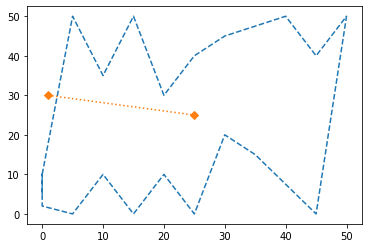

In [121]:
seg2 = Segment(Point(1,30), Point(25,25))
plt.plot(xs, ys, linestyle='dashed')
x2 = [seg2.start.x, seg2.end.x]
y2 = [seg2.start.y, seg2.end.y]
plt.plot(x2, y2, linestyle="dotted", marker="D")
inter_seg_pol(seg2, samplePolygon)


In [122]:
data_p = [[0,5],[0,10],[0,2],[5,0], [10,10], [15,0], [20,10], [25, 0],
             [30, 20], [35, 15], [45, 0], [50, 50], [45, 40], 
             [40, 50], [30, 45], [25, 40], [20, 30], [15, 50],
             [10,35],[5,50], [0, 10]]
samplePolygon = Polygon(data_p, xcol=0, ycol=1)
seg2 = Segment(Point(0,20), Point(25,25))
samplePolygon.containsPoint(seg2.start) == True and samplePolygon.containsPoint(seg2.end) == True
seg = seg2
pol = samplePolygon

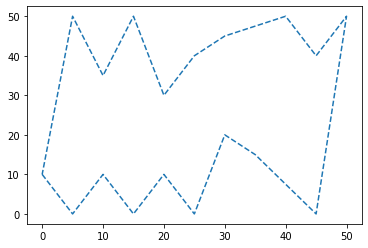

In [123]:
# Sample polygon (random points for the outline of England)
data_p_2 = [[0,10] ,[5,0], [10,10], [15,0], [20,10], [25, 0],
             [30, 20], [35, 15], [45, 0], [50, 50], [45, 40], 
             [40, 50], [30, 45], [25, 40], [20, 30], [15, 50],
             [10,35],[5,50], [0, 10]]
sample2 = Polygon(data_p_2, xcol=0, ycol=1)
xs = [i.x for i in sample2]
ys = [i.y for i in sample2]
plt.plot(xs, ys, linestyle='dashed')


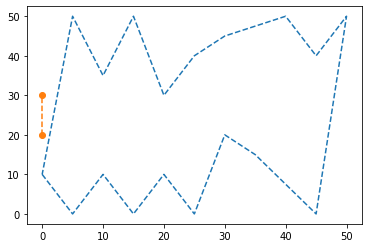

[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]

The intersection length is: 10.00
inside inside


In [124]:
plot_sp(seg1, sample2)
inter_seg_pol(seg1, sample2)

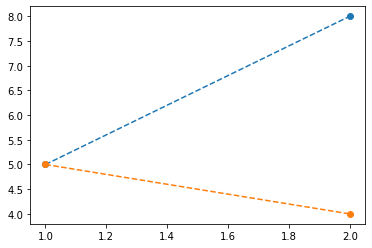

point touches


True

In [125]:
segt1 = Segment(Point(1,5), Point(2,8))
segt2 = Segment(Point(1,5), Point(2,4))
pSS(segt1, segt2)
check_touch(segt1, segt2)

In [126]:
pi = [Point(x=29.58, y=23.14), Point(x=11.00, y=22.00), Point(x=60.00, y=25.00), Point(x =11.00, y = 25)]

In [127]:
pointgroup = pi
n = len(pi)
xlist = []
ylist = []
for i in range(0, n):
    xlist.append(pointgroup[i].x)
    ylist.append(pointgroup[i].y)
xy = pd.DataFrame()
xy['x'] = xlist
xy['y'] = ylist
xy.sort_values(by=['x', 'y'], inplace = True)
xy.reset_index(drop = True, inplace = True)
xy
pointgroup_sorted = []
for i in range(0,n):
    pointgroup_sorted.append(Point(xy['x'][i], xy['y'][i]))
pointgroup_sorted

[Point(x=11.00, y=22.00),
 Point(x=11.00, y=25.00),
 Point(x=29.58, y=23.14),
 Point(x=60.00, y=25.00)]

In [128]:
get_seg_from_pol(pol)


[Segment with start Point(x=0.00, y=5.00) and end Point(x=0.00, y=10.00).,
 Segment with start Point(x=0.00, y=10.00) and end Point(x=0.00, y=2.00).,
 Segment with start Point(x=0.00, y=2.00) and end Point(x=5.00, y=0.00).,
 Segment with start Point(x=5.00, y=0.00) and end Point(x=10.00, y=10.00).,
 Segment with start Point(x=10.00, y=10.00) and end Point(x=15.00, y=0.00).,
 Segment with start Point(x=15.00, y=0.00) and end Point(x=20.00, y=10.00).,
 Segment with start Point(x=20.00, y=10.00) and end Point(x=25.00, y=0.00).,
 Segment with start Point(x=25.00, y=0.00) and end Point(x=30.00, y=20.00).,
 Segment with start Point(x=30.00, y=20.00) and end Point(x=35.00, y=15.00).,
 Segment with start Point(x=35.00, y=15.00) and end Point(x=45.00, y=0.00).,
 Segment with start Point(x=45.00, y=0.00) and end Point(x=50.00, y=50.00).,
 Segment with start Point(x=50.00, y=50.00) and end Point(x=45.00, y=40.00).,
 Segment with start Point(x=45.00, y=40.00) and end Point(x=40.00, y=50.00).,
 Seg

[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True]
no intersection with this edge
no intersection with this edge
no intersection with this edge
no intersection with this edge
no intersection with this edge
no intersection with this edge
no intersection with this edge
no intersection with this edge
no intersection with this edge
no intersection with this edge
no intersection with this edge
no intersection with this edge
no intersection with this edge
no intersection with this edge
no intersection with this edge
no intersection with this edge
no intersection with this edge
no intersection with this edge
intersection!
Segment with start Point(x=5.00, y=50.00) and end Point(x=0.00, y=10.00).
not touch, fine
False
not touch, fine
[Point(x=1.00, y=30.00), Point(x=2.46, y=29.70), Point(x=25.00, y=25.00)]
this small segment is not inside this polygon

The intersection length is: 0.00


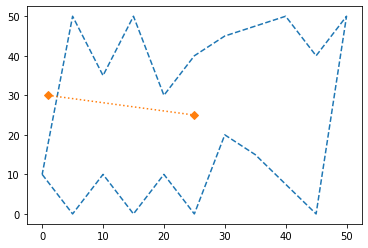

In [129]:
seg2 = Segment(Point(1,30), Point(25,25))
plt.plot(xs, ys, linestyle='dashed')
x2 = [seg2.start.x, seg2.end.x]
y2 = [seg2.start.y, seg2.end.y]
plt.plot(x2, y2, linestyle="dotted", marker="D")
inter_seg_pol(seg2, samplePolygon)


[False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, True, True, True]
no intersection with this edge
no intersection with this edge
no intersection with this edge
no intersection with this edge
no intersection with this edge
no intersection with this edge
no intersection with this edge
no intersection with this edge
no intersection with this edge
no intersection with this edge
no intersection with this edge
no intersection with this edge
no intersection with this edge
intersection!
Segment with start Point(x=30.00, y=45.00) and end Point(x=25.00, y=40.00).
not touch, fine
False
not touch, fine
no intersection with this edge
intersection!
Segment with start Point(x=20.00, y=30.00) and end Point(x=15.00, y=50.00).
not touch, fine
False
not touch, fine
intersection!
Segment with start Point(x=15.00, y=50.00) and end Point(x=10.00, y=35.00).
not touch, fine
False
not touch, fine
intersection!
Segment with start Point(x=10.00

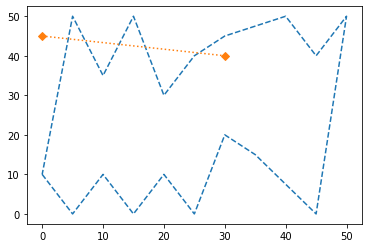

In [130]:
seg2 = Segment(Point(0,45), Point(30,40))
plt.plot(xs, ys, linestyle='dashed')
x2 = [seg2.start.x, seg2.end.x]
y2 = [seg2.start.y, seg2.end.y]
plt.plot(x2, y2, linestyle="dotted", marker="D")
inter_seg_pol(seg2, samplePolygon)


In [30]:
samplePolygon

Polygon PointGroup containing 21 points

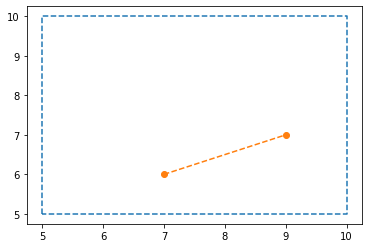

[False, False, False, False]

The intersection length is: 2.24
inside inside


In [75]:
sampledata2 = [[5,5],[5,10],[10,10],[10,5], [5,5]]
samplePolygon2 = Polygon(sampledata2, xcol=0, ycol=1)
seg2 = Segment(Point(7,6), Point(9,7))
plot_sp(seg2, samplePolygon2)
inter_seg_pol(seg2, samplePolygon2)

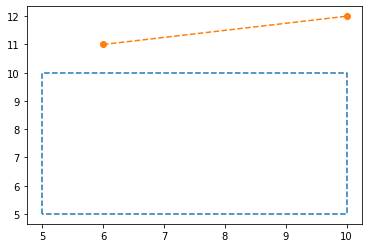

[False, False, False, False]

The intersection length is: 0.00
outside outside


In [79]:
seg3 = Segment(Point(6,11), Point(10,12))
plot_sp(seg3, samplePolygon2)
inter_seg_pol(seg3, samplePolygon2)

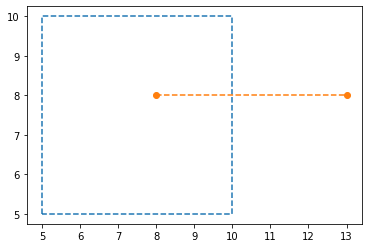

[False, True, False]
intersection!
nope
False
nope
no intersection with this edge
[Point(x=8.00, y=8.00), Point(x=10.00, y=8.00), Point(x=13.00, y=8.00)]

The intersection length is: 2.00


In [101]:
seg4 = Segment(Point(8,8), Point(13,8))
plot_sp(seg4, samplePolygon2)
inter_seg_pol(seg4, samplePolygon2)

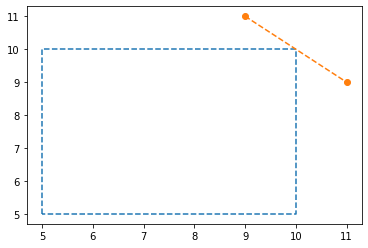

[False, False, False]

The intersection length is: 0.00
outside outside


In [102]:
seg5 = Segment(Point(9,11), Point(11,9))
plot_sp(seg5, samplePolygon2)
inter_seg_pol(seg5, samplePolygon2)

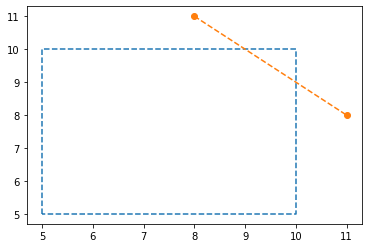

[False, True, True, False]
intersection!
Segment with start Point(x=5.00, y=10.00) and end Point(x=10.00, y=10.00).
not touch, fine
False
not touch, fine
intersection!
Segment with start Point(x=10.00, y=10.00) and end Point(x=10.00, y=5.00).
nope
False
nope
no intersection with this edge
[Point(x=8.00, y=11.00), Point(x=9.00, y=10.00), Point(x=10.00, y=9.00), Point(x=11.00, y=8.00)]
this small segment is not inside this polygon
this small segment is not inside this polygon

The intersection length is: 0.00


In [114]:
seg6 = Segment(Point(8,11), Point(11,8))
plot_sp(seg6, samplePolygon2)
inter_seg_pol(seg6, samplePolygon2)

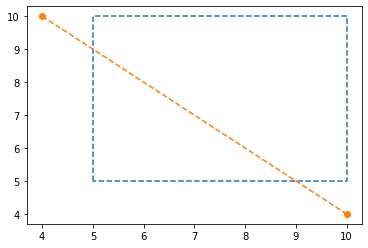

[True, False, False, True]
no intersection with this edge
no intersection with this edge
intersection!
Segment with start Point(x=10.00, y=5.00) and end Point(x=5.00, y=5.00).
not touch, fine
False
not touch, fine
[Point(x=4.00, y=10.00), Point(x=9.00, y=5.00), Point(x=10.00, y=4.00)]

The intersection length is: 1.41


In [113]:
seg7 = Segment(Point(4,10), Point(10,4))
plot_sp(seg7, samplePolygon2)
inter_seg_pol(seg7, samplePolygon2)

In [107]:
get_seg_from_pol(samplePolygon2)

[Segment with start Point(x=5.00, y=5.00) and end Point(x=5.00, y=10.00).,
 Segment with start Point(x=5.00, y=10.00) and end Point(x=10.00, y=10.00).,
 Segment with start Point(x=10.00, y=10.00) and end Point(x=10.00, y=5.00).,
 Segment with start Point(x=10.00, y=5.00) and end Point(x=5.00, y=5.00).]